In [5]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

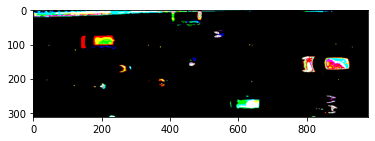

In [38]:
#applying dilation

img = cv2.imread("erode1.png")
plt.imshow(img)

In [151]:

img = cv2.imread("erode1.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.erode(img, kernel, iterations=1) 
image = cv2.dilate(img,None,iterations=1)

#cv2.imshow("erode",image)
#cv2.waitKey(0)
image = image[30:,:]
vehicle_count=0

img = cv2.dilate(image,None,iterations=5)

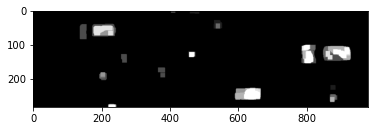

In [171]:
plt.imshow(img,cmap = 'gray')

In [142]:
img.shape

(328, 939)

In [185]:
original = cv2.imread("frames/9.png")
img = cv2.imread("dilated2.png")

lower = [0,0,0]
upper = [10,10,10]
# creates numpy array from boundaries
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")
# finds colors in boundaries a applies a mask
mask = cv2.inRange(img, lower, upper)
output = cv2.bitwise_and(img, img, mask = mask)
# saves the image  #cv2.imwrite('2', output)
#cv2.imshow('js',img)
#cv2.waitKey(0)
tot_pixel = output.size
print(img.shape,output.shape)
red_pixel = np.count_nonzero(output)
percentage = round(red_pixel * 100 / tot_pixel, 2)

print("WHITE pixels: " + str(red_pixel))
print("Total pixels: " + str(tot_pixel))
print("Percentage of WHITE pixels: " + str(percentage) + "%")
print("NON OCCUPANCY OF THE ROAD IS: "+str(100-percentage)+"%")
vehicle_count = 100-percentage
if vehicle_count <=40:
    print("---------RUNNING 40 -----------")
    cv2.circle(original,(90,100),40,(0,0,255),-1)
    
    cv2.putText(original," ROAD OCCUPANCY IS "+str(100 - vehicle_count),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
elif vehicle_count <=70:
    
    print("---------RUNNING 60 -----------")
    cv2.circle(original,(90,100),40,(52,25,48),-1)
    
    cv2.putText(original," ROAD OCCUPANCY IS "+str(100 - vehicle_count),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(52,25,48),2)

else:
    
    print("---------RUNNING 80 -----------")
    cv2.circle(original,(90,100),40,(255,0,0),-1)
    
    cv2.putText(original,"ROAD OCCUPANCY IS "+str(100 - vehicle_count),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
print("0-40 ==> RED "," 41-70==> PURPLE ","71-100 ==> BLUE")
print(vehicle_count)


(282, 981, 3) (282, 981, 3)
WHITE pixels: 0
Total pixels: 829926
Percentage of WHITE pixels: 0.0%
NON OCCUPANCY OF THE ROAD IS: 100.0%
---------RUNNING 80 -----------
0-40 ==> RED   41-70==> PURPLE  71-100 ==> BLUE
100.0


In [186]:
img.shape

(282, 981, 3)

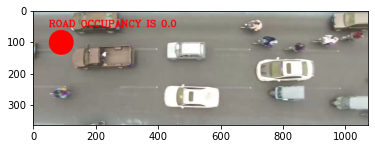

In [187]:
plt.imshow(original)

(282, 981)

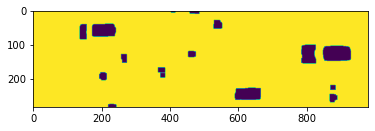

In [190]:
plt.imshow(mask)

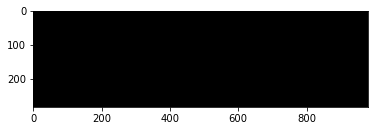

In [191]:
plt.imshow(output)

In [57]:
d = cv2.imread("erode1.png")
image_rgb = cv2.cvtColor(d, cv2.COLOR_RGB2GRAY)

In [107]:
output

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [105]:
np.count_nonzero(output)*100/tot_pixel

5.798635615149377

In [106]:
tot_pixel

918216

In [111]:
img.shape

(328, 939)

In [122]:
new_image = np.empty((img.shape[0],img.shape[1],3),dtype=np.uint8)

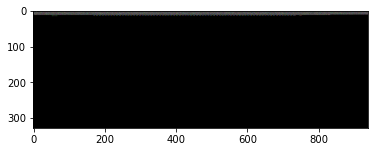

In [123]:
plt.imshow(new_image)

In [124]:
new_image[:,:,0] = img
new_image[:,:,1] = img
new_image[:,:,2] = img

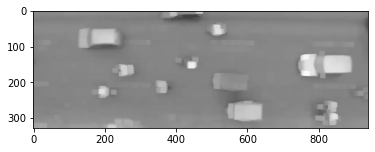

In [128]:
plt.imshow(new_image[:,:,::-1])

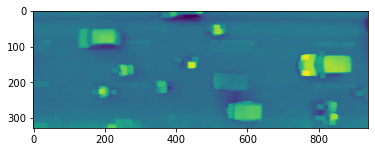

In [129]:
plt.imshow(img)

In [133]:
img.shape

(328, 939)

In [139]:
img = cv2.imread("erode18.png")
brown = [50, 50, 50]  # RGB
diff = 50
boundaries = [([brown[2]-diff, brown[1]-diff, brown[0]-diff],
               [brown[2]+diff, brown[1]+diff, brown[0]+diff])]
# in order BGR as opencv represents images as numpy arrays in reverse order

for (lower, upper) in boundaries:
    lower = np.array(lower, dtype=np.uint8)
    upper = np.array(upper, dtype=np.uint8)
    mask = cv2.inRange(img, lower, upper)
    output = cv2.bitwise_and(img, img, mask=mask)

    ratio_brown = cv2.countNonZero(mask)/(img.size/3)
    print('brown pixel percentage:', np.round(ratio_brown*100, 2))


brown pixel percentage: 86.2


In [202]:
for i in range(1,29):
    img = cv2.imread(f"erode{i}.png")
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.erode(img, kernel, iterations=1) 
    image = cv2.dilate(img,None,iterations=1)

    #cv2.imshow("erode",image)
    #cv2.waitKey(0)
    image = image[30:,:]
    vehicle_count=0

    img = cv2.dilate(image,None,iterations=10)
    cv2.imwrite(f"dilated{i}.png",img)

In [198]:
img.shape

(282, 981)

In [199]:
cv2.imwrite("dilated2.png",img)

True

In [200]:
img = cv2.imread('dilated2.png')

In [201]:
img.shape

(282, 981, 3)

In [1]:
import cv2 
import numpy as np
detected_occupancy = []
#img_name = input("What's the name of the picture? ")
for i in range(1,29):
    img = cv2.imread(f'dilated{i}.png')
    original = cv2.imread(f"frames/{i}.png")
    #img = img[50:,:]
    # boundaries for the color red
    boundaries = [
        ([0, 0, 0], [255, 255, 255])
        ]
    lower = [2,2,2]
    upper = [255,255,255]
    #for(lower, upper) in boundaries:
    # creates numpy array from boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
    # finds colors in boundaries a applies a mask
    mask = cv2.inRange(img, lower, upper)
    output = cv2.bitwise_and(img, img, mask = mask)
    # saves the image  #cv2.imwrite('2', output)
    #cv2.imshow('js',img)
    #cv2.waitKey(0)
    tot_pixel = output.size
    print(img.shape,output.shape)
    red_pixel = np.count_nonzero(output)
    percentage = round(red_pixel * 100 / tot_pixel, 2)

    print("WHITE pixels: " + str(red_pixel))
    print("Total pixels: " + str(tot_pixel))
    print("Percentage of WHITE pixels: " + str(percentage) + "%")
    print("NON OCCUPANCY OF THE ROAD IS: "+str(100-percentage)+"%")
    vehicle_count = 100-percentage
    if vehicle_count <=40:
        print("---------RUNNING 40 -----------")
        cv2.circle(original,(90,100),40,(0,0,255),-1)

        cv2.putText(original," ROAD NON OCCUPANCY IS "+str(vehicle_count),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
    elif vehicle_count <=70:

        print("---------RUNNING 60 -----------")
        cv2.circle(original,(90,100),40,(52,25,48),-1)

        cv2.putText(original," ROAD NON OCCUPANCY IS "+str(vehicle_count),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(52,25,48),2)

    else:

        print("---------RUNNING 80 -----------")
        cv2.circle(original,(90,100),10,(0,0,255),-1)

        cv2.putText(original,"ROAD NON OCCUPANCY IS "+str(vehicle_count),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
    print("0-40 ==> RED "," 41-70==> PURPLE ","71-100 ==> BLUE")
    
    print(vehicle_count)
    detected_occupancy.append(vehicle_count)
    #cv2.imshow("ORIGINAL",original)
    cv2.imwrite(f"occupancy results/occupancy{i}.png",original)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

(282, 981, 3) (282, 981, 3)
WHITE pixels: 74925
Total pixels: 829926
Percentage of WHITE pixels: 9.03%
NON OCCUPANCY OF THE ROAD IS: 90.97%
---------RUNNING 80 -----------
0-40 ==> RED   41-70==> PURPLE  71-100 ==> BLUE
90.97
(282, 981, 3) (282, 981, 3)
WHITE pixels: 127719
Total pixels: 829926
Percentage of WHITE pixels: 15.39%
NON OCCUPANCY OF THE ROAD IS: 84.61%
---------RUNNING 80 -----------
0-40 ==> RED   41-70==> PURPLE  71-100 ==> BLUE
84.61
(282, 981, 3) (282, 981, 3)
WHITE pixels: 165963
Total pixels: 829926
Percentage of WHITE pixels: 20.0%
NON OCCUPANCY OF THE ROAD IS: 80.0%
---------RUNNING 80 -----------
0-40 ==> RED   41-70==> PURPLE  71-100 ==> BLUE
80.0
(282, 981, 3) (282, 981, 3)
WHITE pixels: 173070
Total pixels: 829926
Percentage of WHITE pixels: 20.85%
NON OCCUPANCY OF THE ROAD IS: 79.15%
---------RUNNING 80 -----------
0-40 ==> RED   41-70==> PURPLE  71-100 ==> BLUE
79.15
(282, 981, 3) (282, 981, 3)
WHITE pixels: 192720
Total pixels: 829926
Percentage of WHITE pix

In [3]:
detected_occupancy

[90.97,
 84.61,
 80.0,
 79.15,
 76.78,
 79.72,
 76.17,
 83.41,
 82.71000000000001,
 75.16,
 76.72,
 76.51,
 78.07,
 86.3,
 81.91,
 81.78,
 79.06,
 72.8,
 75.46000000000001,
 78.96000000000001,
 76.65,
 79.67,
 82.07,
 84.92,
 82.39,
 90.44,
 80.88,
 83.92]

<BarContainer object of 28 artists>

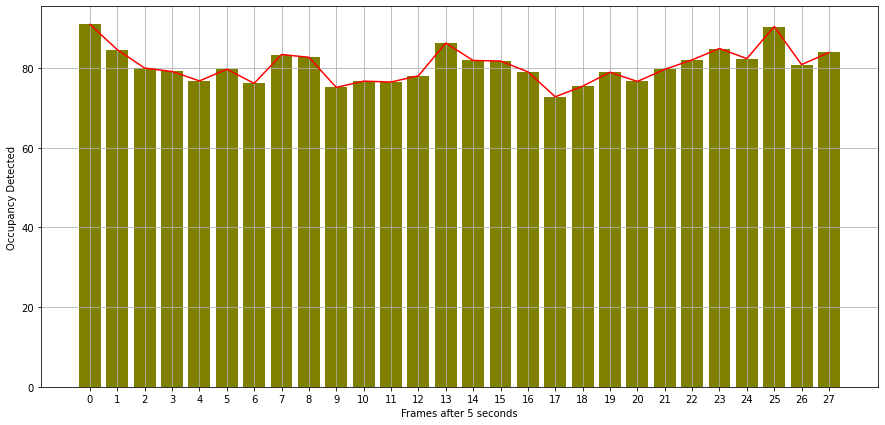

In [22]:
plt.figure(figsize = (15,7))
plt.grid()
plt.xlabel('Frames after 5 seconds')

plt.ylabel('Occupancy Detected')
plt.xticks([x for x in range(28)])
plt.plot([x for x in range(28)],detected_occupancy,color = 'red')
plt.bar([x for x in range(28)],detected_occupancy,color = '#808000')

In [14]:
df = pd.read_excel('Occupancy Data.xlsx')

In [15]:
df

,Frame No.,Vehicular Area,Percent Occupancy,Unnamed: 3,Unnamed: 4,Total Area
0,1,745.92,22.603636,NaN,NaN,3300.0
1,2,1053.50,31.924242,NaN,NaN,NaN
2,3,992.07,30.062727,NaN,NaN,NaN
3,4,976.98,29.605455,NaN,NaN,NaN
4,5,1023.00,31.000000,NaN,NaN,NaN
5,6,1044.26,31.644242,NaN,NaN,NaN
6,7,900.97,27.302121,NaN,NaN,NaN
7,8,673.88,20.420606,NaN,NaN,NaN
8,9,632.28,19.160000,NaN,NaN,NaN
9,10,435.76,13.204848,NaN,NaN,NaN


<BarContainer object of 28 artists>

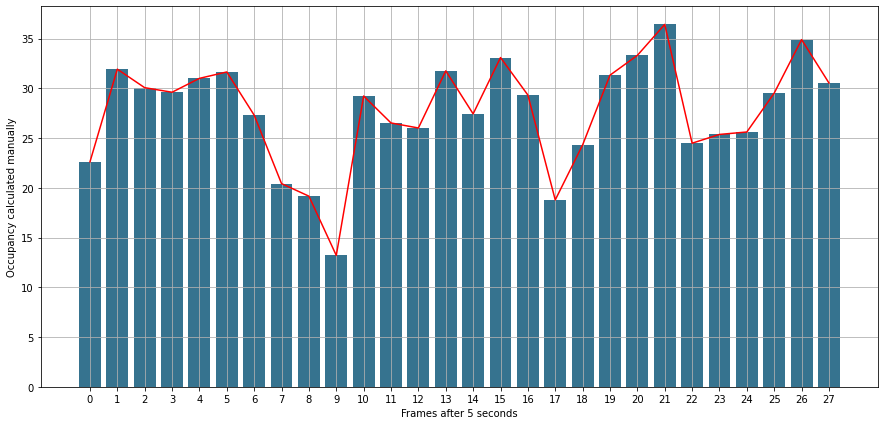

In [23]:
plt.figure(figsize = (15,7))
plt.grid()
plt.xlabel('Frames after 5 seconds')
plt.ylabel('Occupancy calculated manually')
plt.xticks([x for x in range(28)])
plt.plot([x for x in range(28)],df['Percent Occupancy'],color = 'red')
plt.bar([x for x in range(28)],df['Percent Occupancy'], color='#36738f')

In [2]:
img = cv2.imread('frames/1.png')

In [3]:
img

array([[[163, 175, 180],
        [163, 175, 180],
        [161, 173, 178],
        ...,
        [162, 180, 182],
        [162, 180, 182],
        [163, 181, 183]],

       [[162, 175, 178],
        [162, 175, 178],
        [161, 174, 177],
        ...,
        [159, 177, 179],
        [162, 180, 182],
        [163, 181, 183]],

       [[165, 178, 181],
        [163, 176, 179],
        [163, 176, 179],
        ...,
        [159, 177, 179],
        [159, 177, 179],
        [161, 179, 181]],

       ...,

       [[146, 151, 151],
        [146, 151, 151],
        [147, 152, 152],
        ...,
        [144, 147, 147],
        [144, 147, 147],
        [144, 147, 147]],

       [[145, 150, 150],
        [145, 150, 150],
        [145, 150, 150],
        ...,
        [144, 147, 147],
        [144, 147, 147],
        [146, 149, 149]],

       [[145, 150, 150],
        [145, 150, 150],
        [145, 150, 150],
        ...,
        [144, 147, 147],
        [146, 149, 149],
        [146, 149, 149]]

In [5]:
import requests

In [8]:
import json
from ibm_watson import VisualRecognitionV4
from ibm_watson.visual_recognition_v4 import AnalyzeEnums, FileWithMetadata
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator({'apikey':"f7ZHDss0NXTm7pOHOD66yUig8wiyIV9BnApRmsYMvlfJ"})
visual_recognition = VisualRecognitionV4(
    version='2019-02-11',
    authenticator=authenticator
)

visual_recognition.set_service_url({'service_url':"https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/9c23041b-2527-412a-a94e-7092a58e9cc6"})

with open('frames/1.png', 'rb') as honda_file:
    result = visual_recognition.analyze(
        collection_ids=["5826c5ec-6f86-44b1-ab2b-cca6c75f2fc7"],
        features=[AnalyzeEnums.Features.OBJECTS.value],
        images_file=[
            FileWithMetadata(honda_file),
         
        ]).get_result()
    print(json.dumps(result, indent=2))

SyntaxError: invalid syntax (<ipython-input-8-9042df6c2b6f>, line 6)

In [4]:
x = VisualRecognitionV4('2019-02-11', api_key='f7ZHDss0NXTm7pOHOD66yUig8wiyIV9BnApRmsYMvlfJ')

TypeError: __init__() got an unexpected keyword argument 'api_key'

In [11]:
import json
from ibm_watson import VisualRecognitionV4
from ibm_watson.visual_recognition_v4 import AnalyzeEnums, FileWithMetadata
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator


In [12]:
authenticator = IAMAuthenticator(apikey="f7ZHDss0NXTm7pOHOD66yUig8wiyIV9BnApRmsYMvlfJ")

In [13]:
obj = VisualRecognitionV4(version = '2020-09-30',authenticator=authenticator)

In [14]:
obj.set_service_url(service_url = 'https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/9c23041b-2527-412a-a94e-7092a58e9cc6')

In [15]:
x = '='
with open('frames/4.png', 'rb') as honda_file,open('frames/5.png', 'rb') as dice_file:
    result = obj.analyze(
        collection_ids=["913d67e9-57a1-447c-bd81-c3dc7f1f7050"],
        features=[AnalyzeEnums.Features.OBJECTS.value],
        images_file=[
            FileWithMetadata(honda_file),
     
        ]).get_result()
    clear_output()
    print(x*i,end="")
    print('>')

===================>


In [50]:
AnalyzeEnums.Features.OBJECTS.name

'OBJECTS'

In [1]:
from IPython.display import clear_output

In [9]:
x = '='
for i in range(20):
    
    clear_output(wait = True)
    print(x*i,end="")
    print('>')

===================>
